## Autoencoder

An autoencoder is an unsupervised learning technique for neural networks that learns efficient data representations (encoding) by training the network to ignore signal “noise.” Autoencoders can be used for image denoising, image compression, and, in some cases, even generation of image data.

## Flow of Autoencoder

Input Image -> Encoder -> Compressed Representation -> Decoder -> Reconstruct Input Image

## Import Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist

## Load the Dataset

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# normalize the image data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [4]:
# reshape in the input data for the model
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)
x_test.shape

(10000, 28, 28, 1)

## Exploratory Data Analysis

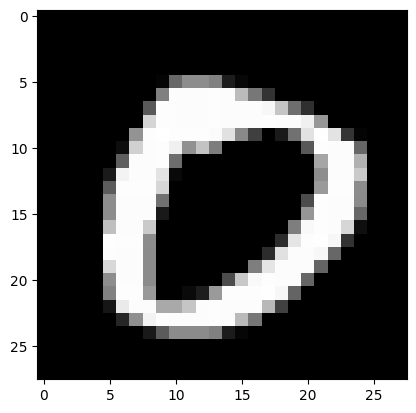

In [5]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

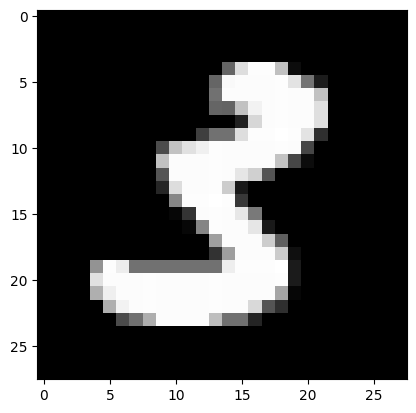

In [6]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

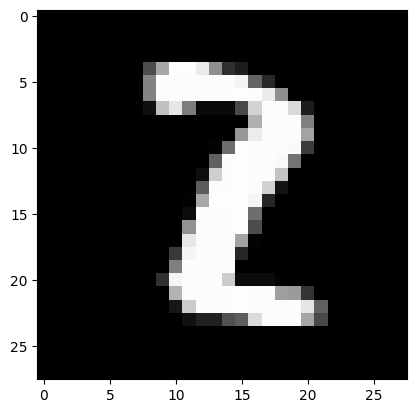

In [7]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

## Model Creation

In [8]:
model = Sequential([
                    # encoder network
                    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
                    MaxPooling2D(2, padding='same'),
                    Conv2D(16, 3, activation='relu', padding='same'),
                    MaxPooling2D(2, padding='same'),
                    # decoder network
                    Conv2D(16, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    Conv2D(32, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    # output layer
                    Conv2D(1, 3, activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

/Users/krish/venvs/ic/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,193 (47.63 KB)

 Trainable params: 12,193 (47.63 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# train the model
model.fit(x_train, x_train, epochs=20, batch_size=256, validation_data=(x_test, x_test))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 175ms/step - loss: 0.3188 - val_loss: 0.0924
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 175ms/step - loss: 0.0897 - val_loss: 0.0818
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 180ms/step - loss: 0.0814 - val_loss: 0.0774
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 45s 193ms/step - loss: 0.0776 - val_loss: 0.0755
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 173ms/step - loss: 0.0755 - val_loss: 0.0738
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 46s 197ms/step - loss: 0.0742 - val_loss: 0.0732
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 176ms/step - loss: 0.0735 - val_loss: 0.0722
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 47s 201ms/step - loss: 0.0727 - val_loss: 0.0716
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 173ms/step - loss: 0.0722 - val_loss: 0.0711
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 43s 182ms/step - loss: 0.0717 - val_loss: 0.0706
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 181ms/step - loss: 0.0711 - val_loss: 0.0705
Epoch 12/20
235/235

## Visualize the Results

In [10]:
# predict the results from model (get compressed images)
pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


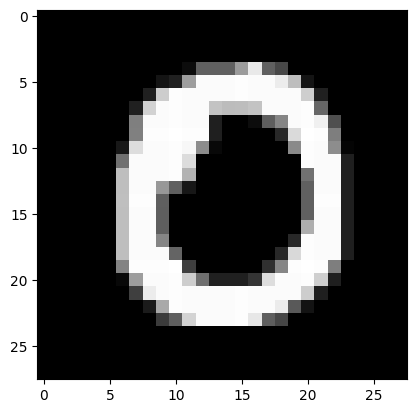

In [11]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

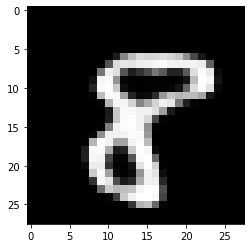

In [24]:
# visualize compressed image
plt.imshow(pred[index].reshape(28,28))
plt.gray()

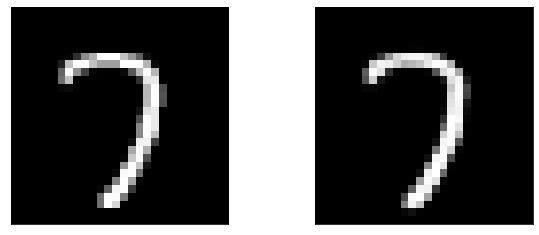

In [28]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

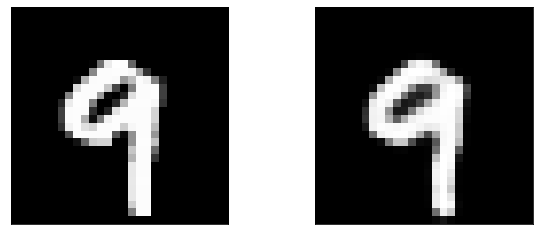

In [29]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

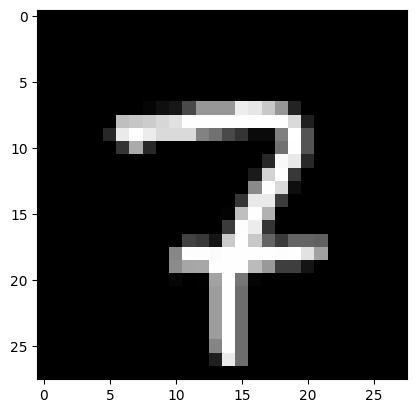

In [12]:
index = np.random.randint(len(x_test))


(28, 28, 1)


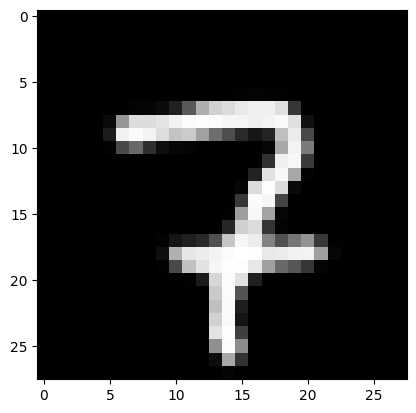

In [21]:
plt.imshow(x_test[index].reshape(28,28))
plt.savefig('original.png')
plt.imshow(pred[index].reshape(28,28))
plt.savefig('compressed.png')

print(x_test[index].shape)

Processed image shape: (28, 28, 1)


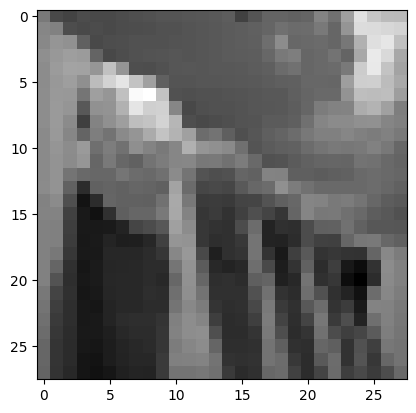

In [82]:
from PIL import Image
import numpy as np

def process_image(img_path, target_shape=(28, 28)):
    # Open the image file
    img = Image.open(img_path)
    
    # Convert image to grayscale
    img = img.convert('L')
    
    # Resize image
    img = img.resize(target_shape)
    
    # Convert image to numpy array
    img_array = np.array(img)
    
    # Normalize the image data to 0-1
    img_array = img_array / 255.0
    
    # Reshape the array to (28, 28, 1)
    img_array = img_array.reshape((target_shape[0], target_shape[1], 1))
    
    return img_array

img_path = 'image.png'
processed_img = np.array(Image.open(img_path).resize((28, 28)).convert('L')).reshape(28, 28, 1)
print('Processed image shape:', processed_img.shape)
plt.imshow(processed_img)

In [83]:
pred = model.predict([processed_img])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


In [84]:
plt.figure()
print(pred[0].shape)


(28, 4, 1)


<Figure size 640x480 with 0 Axes>

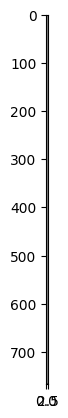

In [81]:
plt.imshow(pred[0])

In [32]:
plt.imshow(pred[0].reshape(28,28))

ValueError: cannot reshape array of size 112 into shape (28,28)